# Contenido (hipervínculos)

1. <a href="L2D"> Modelo </a>

2. <a href="#caso1">Caso 1: Cilindro sumergido</a>

3. <a href="#caso2"> Caso 2: Isla cónica (NOAA)</a>

4. <a href="#caso3"> Caso 3: Chile 2010 (Moreno)</a>

<a id="L2D"> </a>
 # COMCOT  lineal 2D sin borde móvil


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
def simulation(x,h,eta,p,q,rx,ry,dx,dy,cfl,nt,gx):
    dp1 = np.zeros_like(x)
    dp2 = np.zeros_like(x)
    dq1 = np.zeros_like(x)
    dq2 = np.zeros_like(x)

    zdepth = np.zeros_like(eta)
    zdepth[0,:,:] = eta[0,:,:]+h

    t0 = time.clock()
    for n in range(nt-1):


        ## Mas Loop
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                if (h[i,j]>gx):
                    zzz = eta[n,i,j] - rx*(p[n,i,j]-p[n,i-1,j]) \
                                   - ry*(q[n,i,j]-q[n,i,j-1])
                    DD = zzz + h[i,j]
                    zdepth[n+1,i,j] = DD
                    eta[n+1,i,j] = zzz    
                else:
                    eta[n+1,i,j] = 0.0
        # open boundary
        i = 0
        for j in range(1,ny-1):
            if h[i,j]>gx:
                cc = np.sqrt(9.81*h[i,j])
                if h[i,j-1]>gx:
                    uh = 0.5*(q[n,i,j]+q[n,i,j-1])
                else:
                    uh = q[n,i,j]
                uu = np.sqrt(uh**2+p[n,i,j]**2)
                zz = uu/cc
                if p[n,i,j]>0:
                    zz = -zz
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]
            else:
                zz = 0.0
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]

        i = nx-1
        for j in range(1,ny-1):
            if h[i,j]>gx:
                cc = np.sqrt(9.81*h[i,j])
                uh = 0.5*(q[n,i,j]+q[n,i,j-1])
                uu = np.sqrt(uh**2+p[n,i-1,j]**2)
                zz = uu/cc
                if p[n,i-1,j]<0:
                    zz = -zz
                eta[n+1,i,j] = zz     
                zdepth[n+1,i,j] = zz+h[i,j]
            else:
                zz = 0.0
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]

        j = 0
        for i in range(1,nx-1):
            if h[i,j]>gx:
                cc = np.sqrt(9.81*h[i,j])
                uh = 0.5*(p[n,i,j]+p[n,i-1,j])
                uu = np.sqrt(uh**2+q[n,i,j]**2)
                zz = uu/cc
                if q[n,i,j]>0:
                    zz = -zz
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]
            else:
                zz = 0.0
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]                        

        j = ny-1
        for i in range(1,nx-1):
            if h[i,j]>gx:
                cc = np.sqrt(9.81*h[i,j])
                uh = 0.5*(p[n,i,j]+p[n,i-1,j])
                uu = np.sqrt(uh**2+q[n,i,j-1]**2)
                zz = uu/cc
                if q[n,i,j-1]<0:
                    zz = -zz
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]
            else:
                zz = 0.0
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]                

        i = 0
        j = 0
        if h[i,j]>gx:
            cc = np.sqrt(9.81*h[i,j])
            qx = p[n,i,j]
            qy = q[n,i,j]
            uu = np.sqrt(qx**2+qy**2)        
            zz = uu/cc
            if qx>0 or qy>0:
                zz = -zz
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]
        else:
            zz = 0.0
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]           

        i = nx-1
        j = 0
        if h[i,j]>gx:
            cc = np.sqrt(9.81*h[i,j])
            qx = p[n,i-1,j]
            qy = q[n,i,j]
            uu = np.sqrt(qx**2+qy**2)        
            zz = uu/cc
            if qx<0 or qy>0:
                zz = -zz
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]
        else:
            zz = 0.0
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]                 

        i = 0
        j = ny-1
        if h[i,j]>gx:
            cc = np.sqrt(9.81*h[i,j])
            qx = p[n,i,j]
            qy = q[n,i,j-1]
            uu = np.sqrt(qx**2+qy**2)        
            zz = uu/cc
            if qx>0 or qy<0:
                zz = -zz
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]
        else:
            zz = 0.0
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]

        i = nx-1
        j = ny-1
        if h[i,j]>gx:
            cc = np.sqrt(9.81*h[i,j])
            qx = p[n,i-1,j]
            qy = q[n,i,j-1]
            uu = np.sqrt(qx**2+qy**2)        
            zz = uu/cc
            if qx<0 or qy<0:
                zz = -zz
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]
        else:
            zz = 0.0
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]                  
        # los bordes se pueden ignorar????....
        i = 0
        for j in range(1,ny-1):
            if h[i,j]>gx:
                cc = np.sqrt(9.81*h[i,j])
                if h[i,j-1]>gx:
                    uh = 0.5*(q[n,i,j]+q[n,i,j-1])
                else:
                    uh = q[n,i,j]
                uu = np.sqrt(uh**2+p[n,i,j]**2)
                zz = uu/cc
                if p[n,i,j]>0:
                    zz = -zz
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]
            else:
                zz = 0.0
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]

        i = nx-1
        for j in range(1,ny-1):
            if h[i,j]>gx:
                cc = np.sqrt(9.81*h[i,j])
                uh = 0.5*(p[n,i,j]+p[n,i,j-1])
                uu = np.sqrt(uh**2+p[n,i-1,j]**2)
                zz = uu/cc
                if p[n,i-1,j]<0:
                    zz = -zz
                eta[n+1,i,j] = zz     
                zdepth[n+1,i,j] = zz+h[i,j]
            else:
                zz = 0.0
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]

        j = 0
        for i in range(1,nx-1):
            if h[i,j]>gx:
                cc = np.sqrt(9.81*h[i,j])
                uh = 0.5*(p[n,i,j]+p[n,i-1,j])
                uu = np.sqrt(uh**2+q[n,i,j]**2)
                zz = uu/cc
                if q[n,i,j]>0:
                    zz = -zz
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]
            else:
                zz = 0.0
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]        

        j = ny-1
        for i in range(1,nx-1):
            if h[i,j]>gx:
                cc = np.sqrt(9.81*h[i,j])
                uh = 0.5*(p[n,i,j]+p[n,i-1,j])
                uu = np.sqrt(uh**2+q[n,i,j-1]**2)
                zz = uu/cc
                if q[n,i,j-1]<0:
                    zz = -zz
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j]
            else:
                zz = 0.0
                eta[n+1,i,j] = zz
                zdepth[n+1,i,j] = zz+h[i,j] 
        i = 0
        j = 0
        if h[i,j]>gx:
            cc = np.sqrt(9.81*h[i,j])
            qx = p[n,i,j]
            qy = q[n,i,j]
            uu = np.sqrt(qx**2+qy**2)        
            zz = uu/cc
            if qx>0 or qy>0:
                zz = -zz
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]
        else:
            zz = 0.0
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]           

        i = nx-1
        j = 0
        if h[i,j]>gx:
            cc = np.sqrt(9.81*h[i,j])
            qx = p[n,i-1,j]
            qy = q[n,i,j]
            uu = np.sqrt(qx**2+qy**2)        
            zz = uu/cc
            if qx<0 or qy>0:
                zz = -zz
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]
        else:
            zz = 0.0
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]                 

        i = 0
        j = ny-1
        if h[i,j]>gx:
            cc = np.sqrt(9.81*h[i,j])
            qx = p[n,i,j]
            qy = q[n,i,j-1]
            uu = np.sqrt(qx**2+qy**2)        
            zz = uu/cc
            if qx>0 or qy<0:
                zz = -zz
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]
        else:
            zz = 0.0
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]

        i = nx-1
        j = ny-1
        if h[i,j]>gx:
            cc = np.sqrt(9.81*h[i,j])
            qx = p[n,i-1,j]
            qy = q[n,i,j-1]
            uu = np.sqrt(qx**2+qy**2)        
            zz = uu/cc
            if qx<0 or qy<0:
                zz = -zz
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]
        else:
            zz = 0.0
            eta[n+1,i,j] = zz
            zdepth[n+1,i,j] = zz+h[i,j]               

        # momentum loop

        # momentum in x-direction
        for i in range(0,nx-1):
            for j in range(0,ny-1):
                ip1 = min(nx-1,i+1)
                jp1 = max(0,i-1)
                
                if h[i,j]>gx and h[ip1,j]>gx:
                    hM = 0.5*(h[i,j]+h[ip1,j]) + 0.5 *(eta[n+1,i,j]+eta[n+1,ip1,j])
                    p[n+1,i,j]  = p[n,i,j] - 9.81 * rx*hM * (eta[n+1,ip1,j]-eta[n+1,i,j])
                else:
                    p[n+1,i,j] = 0.0

        # momentum in y-direction
        for i in range(0,nx-1):
            for j in range(0,ny-1):
                ip1 = min(nx-1,i+1)
                jp1 = min(ny-1,j+1)
                
                if h[i,j]>gx and h[i,jp1]>gx:
                    hN = 0.5*(h[i,j]+h[i,jp1]) + 0.5 *(eta[n+1,i,j]+eta[n+1,i,jp1])
                    q[n+1,i,j]  = q[n,i,j] - 9.81 *ry* hN * (eta[n+1,i,jp1]-eta[n+1,i,j])
                else:
                    q[n+1,i,j] = 0.0  
    
        t1 = time.clock()    
        print '%.3f'%(n*1.0/nt), 'elapsed: %.3f s, estimated %.3f s:'%(t1-t0,(t1-t0)*nt*1.0/(n+1))
    return eta,p,q

* Revisar condiciones de borde

<a id="caso1"></a>
# Caso de prueba #1: 
# Campana gaussiana sobre cilindro sumergido

In [ ]:
nt = 300
ny = 100
nx = 100
y = np.linspace(-200,200,ny)
x = np.linspace(-200,200,nx)
x,y = np.meshgrid(x,y,indexing='ij')
h = np.ones_like(x)*5.
h = np.where(np.abs(x**2+y**2)<=50**2,1.0,h)
# h = np.where(x>=90,-2,h)
# h = np.where(y<=-90,-2,h)
# h = np.where(y>=90,-2,h)

## Batimetría

In [ ]:
plt.pcolormesh(x,y,-h)
plt.axis('equal')
plt.title('-h')
plt.colorbar()

## Condición inicial (sup libre)

In [ ]:
eta = np.zeros((nt,nx,ny))
eta[0,:,:] = 00.5*np.exp(-((y+60)**2+(x+60)**2)/500) ##gaussian bell
eta[0,:,:] = np.where(h>=0,eta[0,:,:],-h)
plt.pcolormesh(x,y,eta[0,:,:],vmax=0.6)
plt.axis('equal')
plt.title(u'$\eta$',fontsize=26)
plt.colorbar()

In [ ]:
p = np.zeros((nt,nx,ny))
q = np.zeros((nt,nx,ny))

In [ ]:
cfl = 0.45
dx = np.diff(x.T)[0,0]
dy = np.diff(y)[0,0]
dt = cfl*min(dx,dy)/np.sqrt(np.max(h)*9.81)
rx = dt/dx
ry = dt/dy
gx = 1e-5
grx = 9.81*dt/dx
gry = 9.81*dt/dy

## Simulación

In [ ]:
eta,p,q = simulation(x,h,eta,p,q,rx,ry,dx,dy,cfl,nt,gx)

## Animación

Se ve bien la refracción, excepto por la condición de borde.

In [ ]:
from matplotlib import animation
from JSAnimation import IPython_display

fig = plt.figure()
ax2 = fig.add_subplot(111)
quad1 = ax2.pcolormesh(x,y,eta[0,:,:],shading='gouraud',vmax=0.6)
ax2.contour(x,y,h,[2.0, 1.0],colors='k')
ax2.contour(x,y,h,[0.0],colors='w')

ax2.set_xlabel('time')
ax2.set_ylabel('amplitude')
cb2 = fig.colorbar(quad1,ax=ax2)
ax2.set_aspect('equal')
def init():
    quad1.set_array([])
    return quad1,


def animate(i):
    quad1.set_array(eta[min(i*10,299),:,:].ravel())
    return quad1,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=30, interval=100)

<a id="caso2"></a>

# [Caso 2: Isla cónica (NOAA)](http://nctr.pmel.noaa.gov/benchmark/Laboratory/Laboratory_ConicalIsland/index.html)

In [ ]:
def topo(x,y):
    """
    Conical island
    """
    # Depth of water: 0.32 or 0.42 meters for benchmarks.
    depth = 0.32
    r = np.sqrt(x**2 + y**2) 
    z = np.where(r < 1.1, 0.625, 0.625 - 0.25*(r-1.1))
    z = np.where(r < 3.6, z, 0.)
    z = z - depth
    return z

In [ ]:
def qinit(x,y):
    """
    Wave approaching from left.
    (Used as initial test problem)
    """
    hjump = 0.3
#     z = np.where((x > -9.) & (x < -7.), hjump, 0.)
    z = 0.01*np.exp(-(x+8)**2)
    return z

In [ ]:
nt = 250
ny = 100
nx = 125
y = np.linspace(-15,15,ny)
x = np.linspace(-22.5,15,nx)
x,y = np.meshgrid(x,y,indexing='ij')
h = -topo(x,y)

In [ ]:
plt.pcolormesh(x,y,h)
plt.colorbar()

In [ ]:
eta = np.zeros((nt,nx,ny))
eta[0,:,:] = 0.001*np.exp(-(x+10)**2/4) ##gaussian bell
eta[0,:,:] = np.where(h>=0,eta[0,:,:],-h)
plt.pcolormesh(x,y,eta[0,:,:],vmax=0.002)
plt.axis('equal')
plt.title(u'$\eta$',fontsize=26)
plt.colorbar()

In [ ]:
p = np.zeros((nt,nx,ny))
q = np.zeros((nt,nx,ny))
cfl = 0.45
dx = np.diff(x.T)[0,0]
dy = np.diff(y)[0,0]
dt = cfl*min(dx,dy)/np.sqrt(np.max(h)*9.81)
rx = dt/dx
ry = dt/dy
gx = 1e-5
grx = 9.81*dt/dx
gry = 9.81*dt/dy

In [ ]:
eta,p,q = simulation(x,h,eta,p,q,rx,ry,dx,dy,cfl,nt,gx)
print 'finished!'

In [ ]:
from matplotlib import animation
from JSAnimation import IPython_display

fig = plt.figure()
ax2 = fig.add_subplot(111)
quad1 = ax2.pcolormesh(x,y,eta[0,:,:],shading='gouraud',vmin=-0.001,vmax=0.001)
ax2.contour(x,y,h,colors='k')

ax2.set_xlabel('time')
ax2.set_ylabel('amplitude')
# ax2.set_xlim(-10,5)
# ax2.set_ylim(-5,5)
cb2 = fig.colorbar(quad1,ax=ax2)
ax2.set_aspect('equal')
def init():
    quad1.set_array([])
    return quad1,


def animate(i):
    quad1.set_array(eta[i*5,:,:].ravel())
    return quad1,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=50, interval=100)

In [ ]:
from matplotlib import animation
from JSAnimation import IPython_display

fig = plt.figure()
ax2 = fig.add_subplot(111)
quad1 = ax2.pcolormesh(x,y,eta[0,:,:],shading='gouraud',vmin=-0.002,vmax=0.002)
ax2.contour(x,y,h,colors='k')

ax2.set_xlabel('time')
ax2.set_ylabel('amplitude')
ax2.set_xlim(-10,5)
ax2.set_ylim(-5,5)
cb2 = fig.colorbar(quad1,ax=ax2)
ax2.set_aspect('equal')
def init():
    quad1.set_array([])
    return quad1,


def animate(i):
    quad1.set_array(eta[i*4,:,:].ravel())
    return quad1,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=50, interval=100)

Falla el borde $j=ny$ y $i=0$

# Caso 3: Tsunami Chile 2010

La funcion que programo en la GPU es esta (sin condicion de borde...: *just wish for the best*)

In [3]:
from scipy.io import loadmat

In [4]:
h = loadmat('../data/MorenoCS_h')
falla = loadmat('../data/MorenoCS_z')

In [5]:
xb = h['xh'][0,0][0,:]
yb = h['yh'][0,0][0,:]
zb = h['zh'][0,0]
zf = falla['zf'][0,0]
xf = falla['xf'][0,0][0,:]
yf = falla['yf'][0,0][0,:]

(72,) (99,) (99, 72)


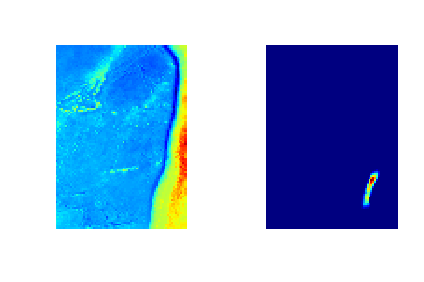

In [6]:
# plt.figure(figsize=(9,9))
r = 6
print xb[::r].shape,yb[::r].shape,zb[::r,::r].shape
plt.subplot(121)
plt.pcolormesh(xb[::r],yb[::r],zb[::r,::r],vmin=-8000,vmax=6000)
plt.axis('equal')
plt.axis('off')
plt.subplot(122)
plt.pcolormesh(xf[::r],yf[::r],zf[::r,::r],vmin=0.0)
plt.axis('off')
plt.axis('equal')
plt.tight_layout()

144 198


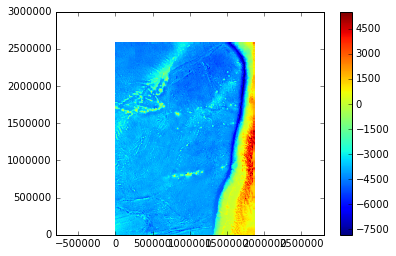

In [15]:
r = 3
nt = 600
x = xb[::r] - xb.min()
y = yb[::r] - yb.min()
x,y = np.meshgrid(x,y,indexing='ij')
h = -zb[::r,::r].T

nx,ny = x.shape
plt.pcolormesh(x,y,-h)
plt.axis('equal')
plt.colorbar()
print nx,ny

In [16]:
p = np.zeros((nt,nx,ny))
q = np.zeros((nt,nx,ny))
cfl = 0.45
dx = np.diff(x.T)[0,0]
dy = np.diff(y)[0,0]
dt = cfl*min(dx,dy)/np.sqrt(np.max(h)*9.81)
rx = dt/dx
ry = dt/dy
gx = 1e-2
grx = 9.81*dt/dx
gry = 9.81*dt/dy
print dx,dy,dt,rx,ry,gx

13122 13122 21.3101075463 0.00162399844127 0.00162399844127 0.01


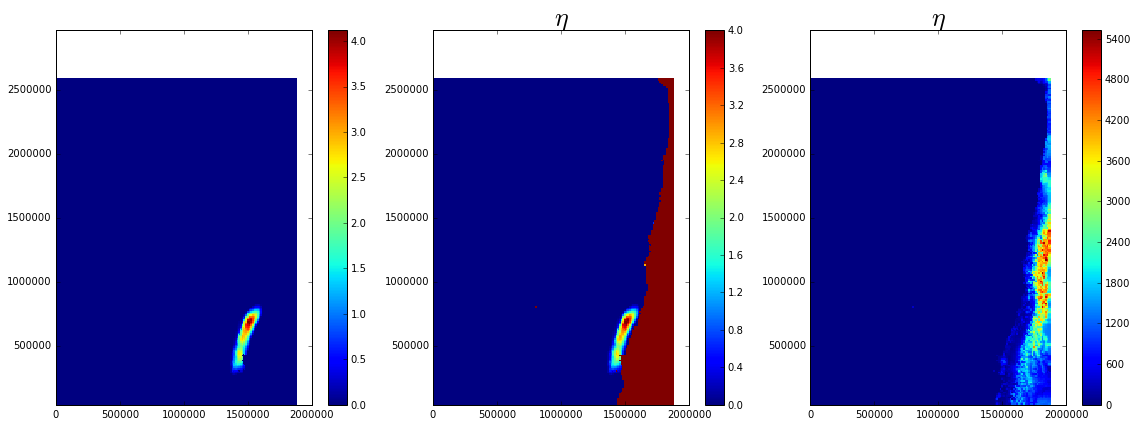

In [17]:
eta = np.zeros((nt,nx,ny))
eta[0,:,:] = zf[::r,::r].T
eta[0,:,:] = np.where(eta[0,:,:]<0,0.0,eta[0,:,:])
eta[0,:,:] = np.where(h>gx,eta[0,:,:],-h)

plt.figure(figsize=(16,6))
plt.subplot(131)
plt.pcolormesh(x,y,zf[::r,::r].T,vmin=0.0)
plt.colorbar()
plt.axis('equal')
plt.subplot(132)
plt.pcolormesh(x,y,eta[0,:,:],vmax=4)
plt.axis('equal')
plt.title(u'$\eta$',fontsize=26)
plt.colorbar()
plt.subplot(133)
plt.pcolormesh(x,y,eta[0,:,:])
plt.axis('equal')
plt.title(u'$\eta$',fontsize=26)
plt.colorbar()
plt.tight_layout()

In [18]:
eta,p,q = simulation(x,h,eta,p,q,rx,ry,dx,dy,cfl,nt,gx)
print 'finished!'

0.000 elapsed: 0.272 s, estimated 163.462 s:
0.002 elapsed: 0.544 s, estimated 163.102 s:
0.003 elapsed: 0.805 s, estimated 160.995 s:
0.005 elapsed: 1.079 s, estimated 161.812 s:
0.007 elapsed: 1.345 s, estimated 161.371 s:
0.008 elapsed: 1.602 s, estimated 160.205 s:
0.010 elapsed: 1.866 s, estimated 159.905 s:
0.012 elapsed: 2.131 s, estimated 159.814 s:
0.013 elapsed: 2.398 s, estimated 159.853 s:
0.015 elapsed: 2.662 s, estimated 159.733 s:
0.017 elapsed: 2.940 s, estimated 160.367 s:
0.018 elapsed: 3.211 s, estimated 160.547 s:
0.020 elapsed: 3.473 s, estimated 160.280 s:
0.022 elapsed: 3.731 s, estimated 159.911 s:
0.023 elapsed: 3.989 s, estimated 159.545 s:
0.025 elapsed: 4.270 s, estimated 160.113 s:
0.027 elapsed: 4.555 s, estimated 160.760 s:
0.028 elapsed: 4.822 s, estimated 160.727 s:
0.030 elapsed: 5.087 s, estimated 160.645 s:
0.032 elapsed: 5.363 s, estimated 160.896 s:
0.033 elapsed: 5.626 s, estimated 160.730 s:
0.035 elapsed: 5.884 s, estimated 160.478 s:
0.037 elap

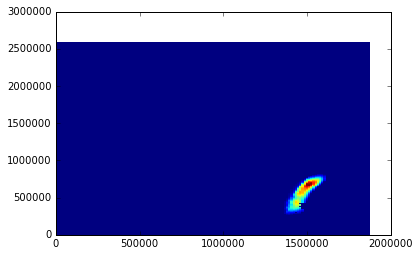

In [19]:
plt.pcolormesh(x,y,eta[1,:,:],vmax=4.)


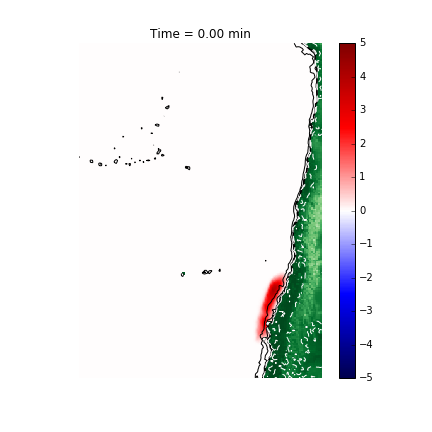
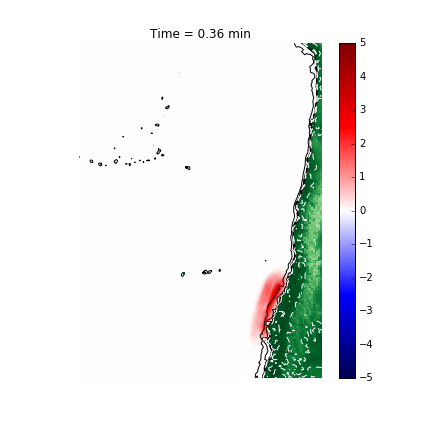
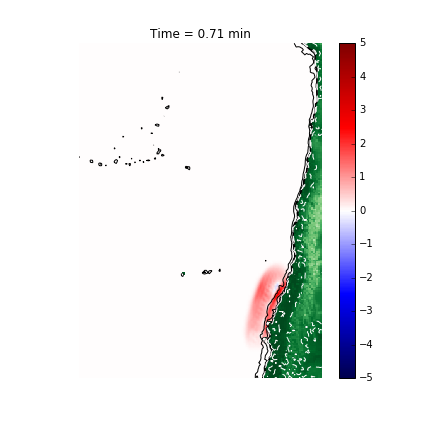
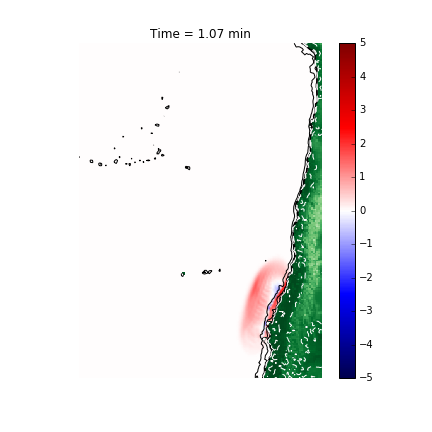
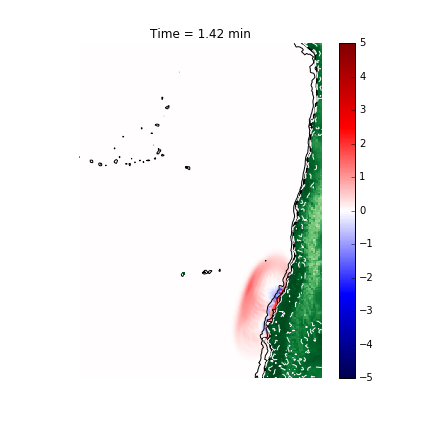
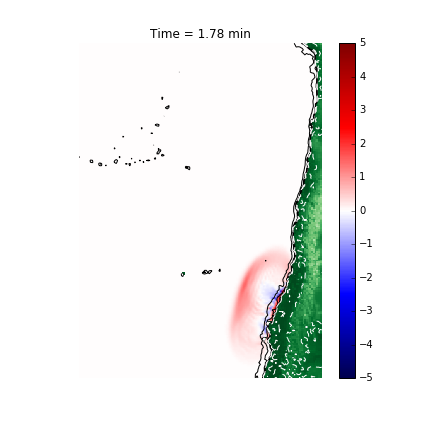
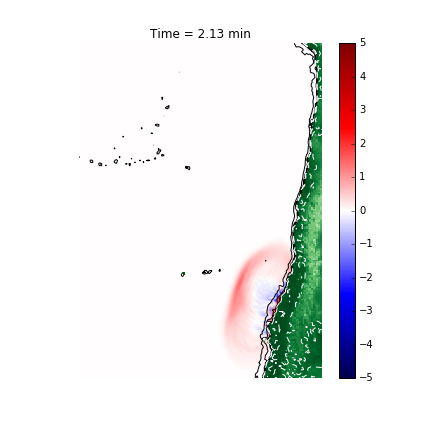
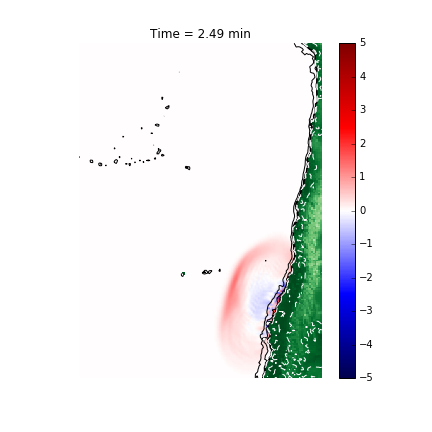
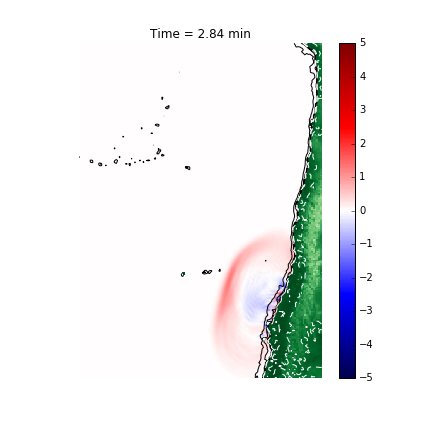
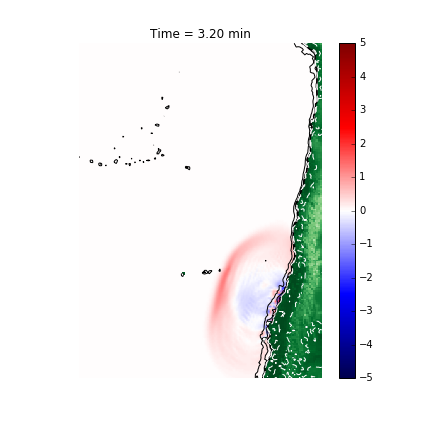
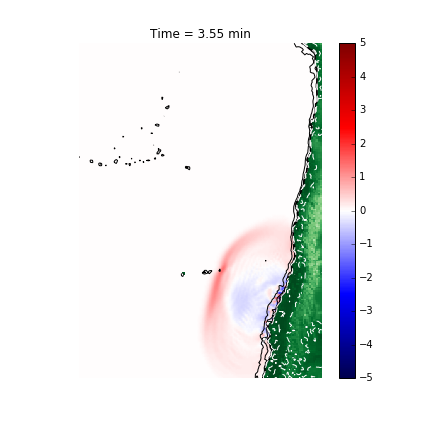
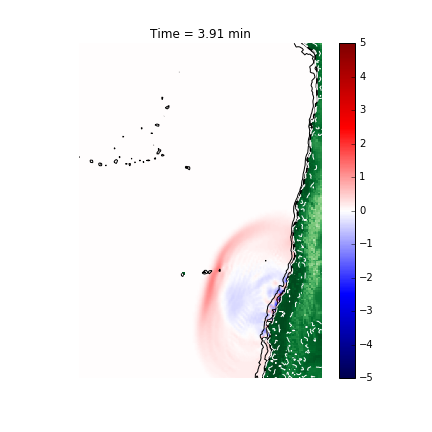
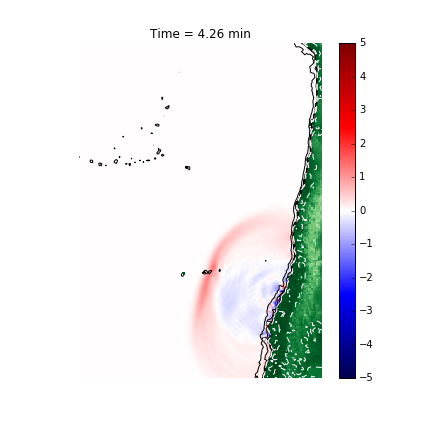
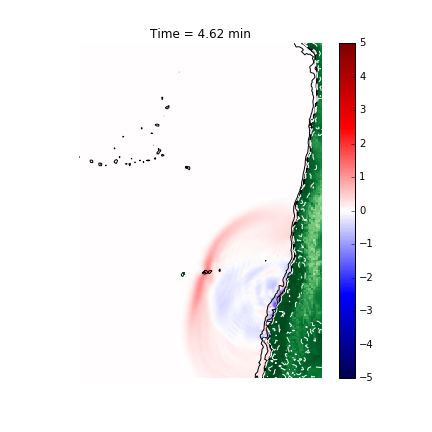
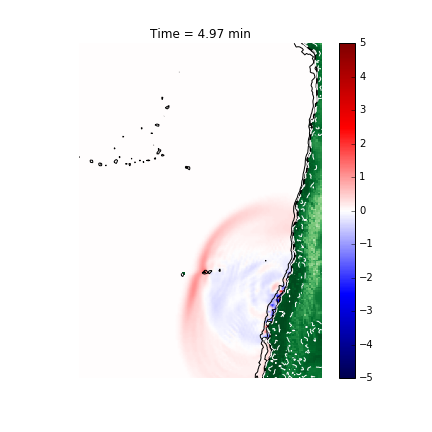
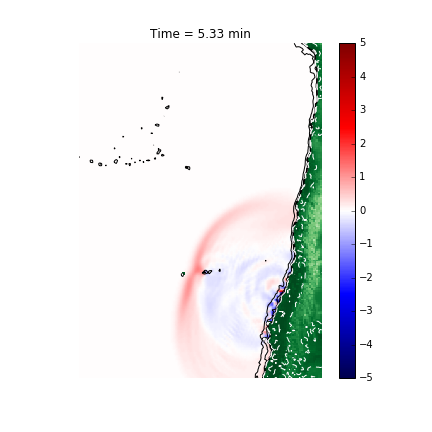
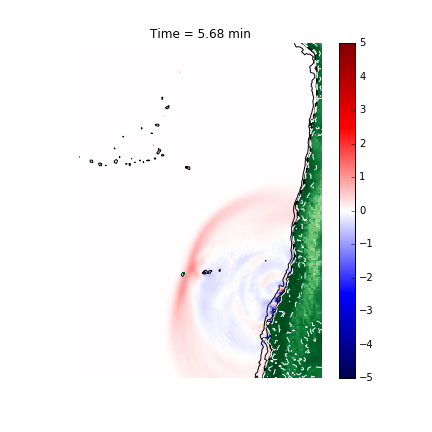
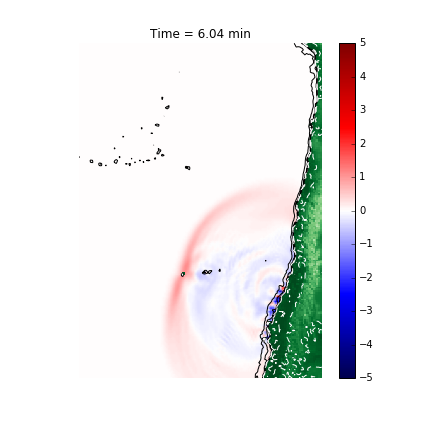
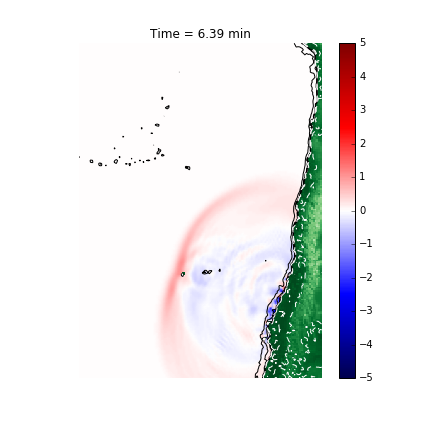
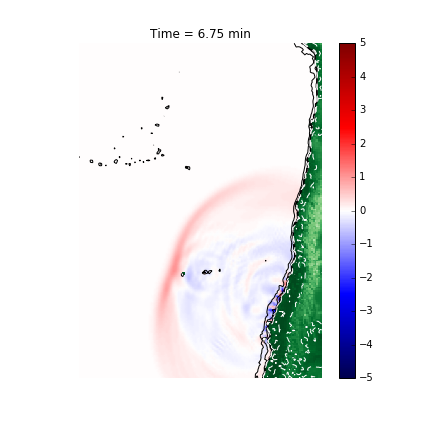
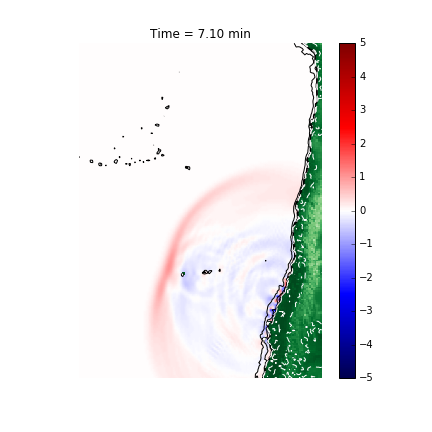
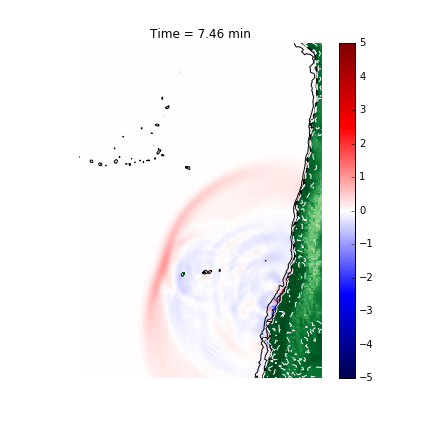
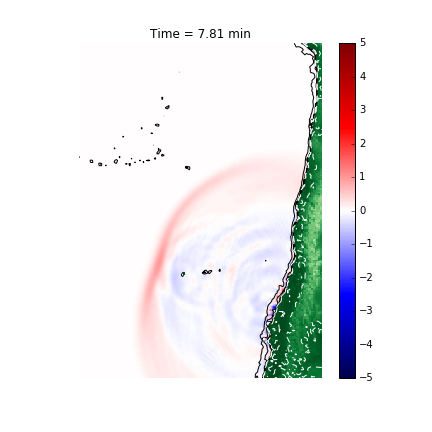
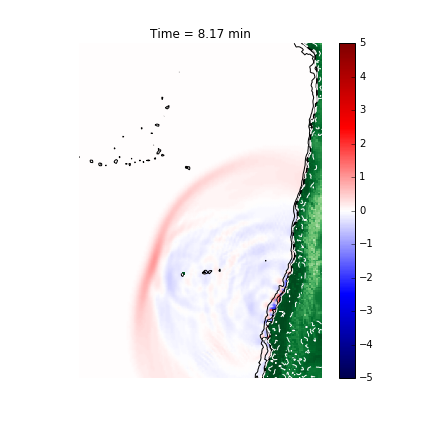
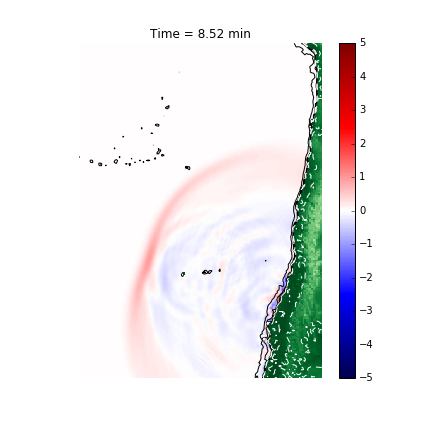
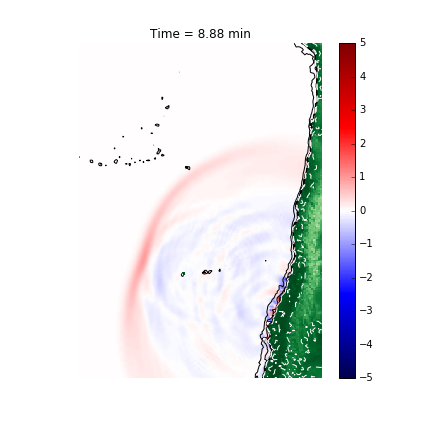
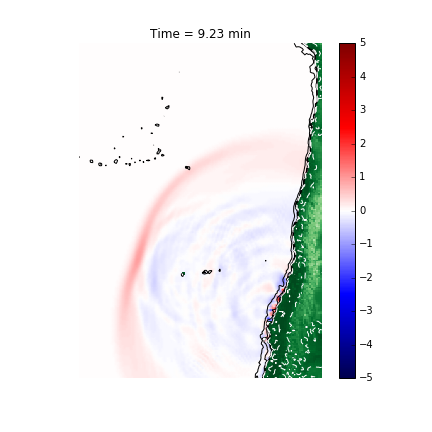
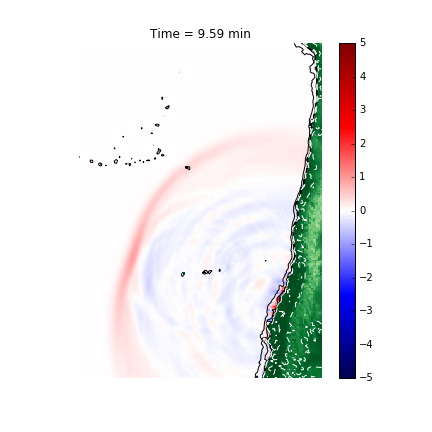
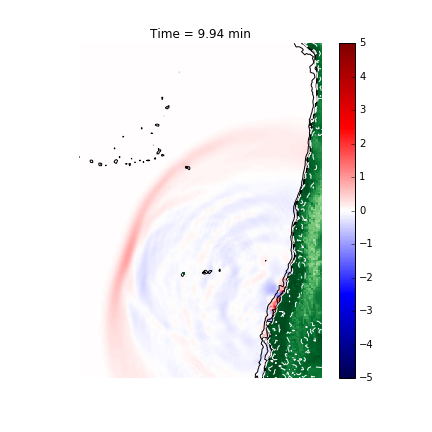
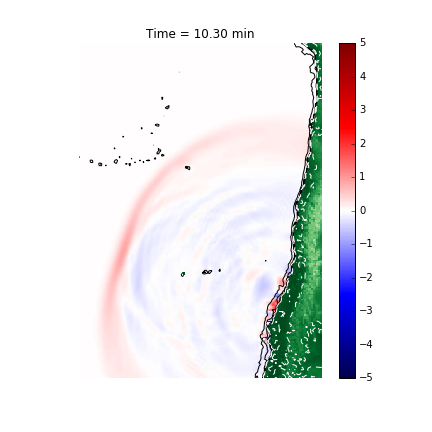
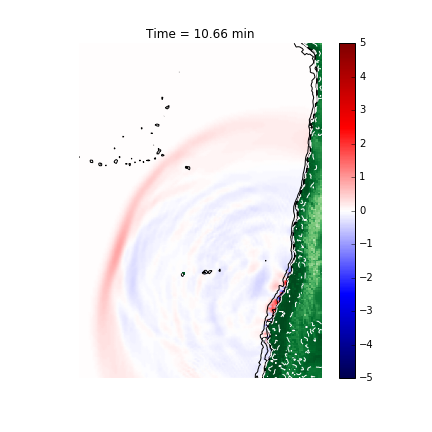
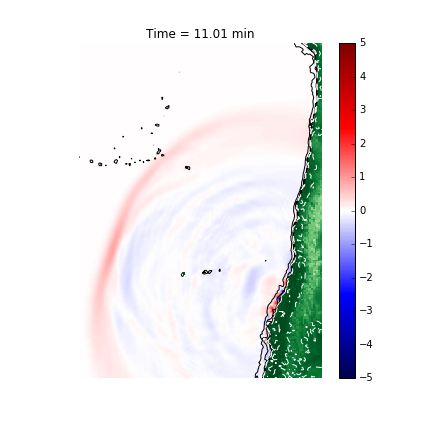
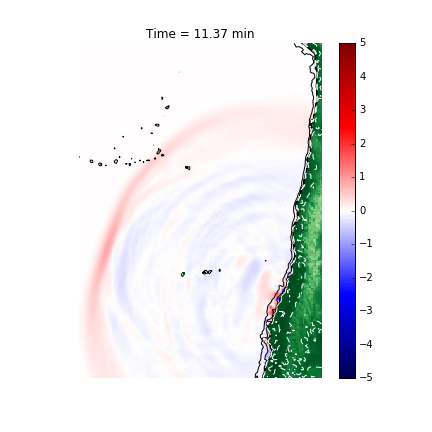
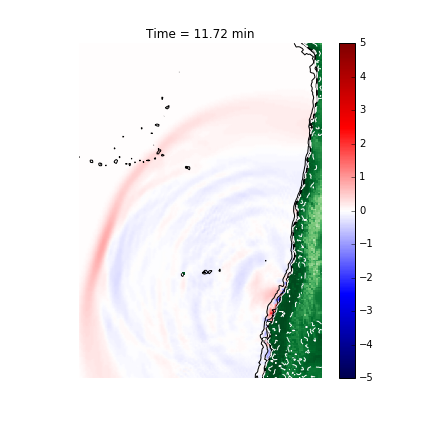
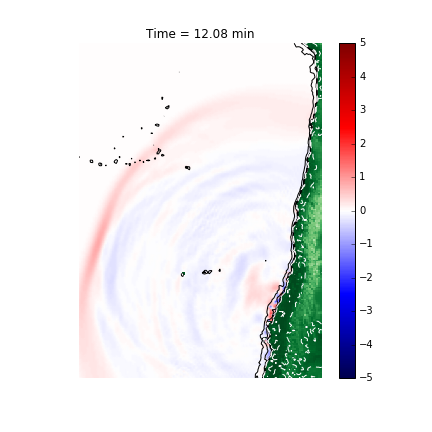
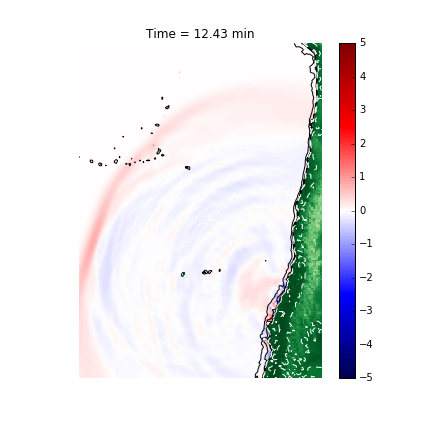
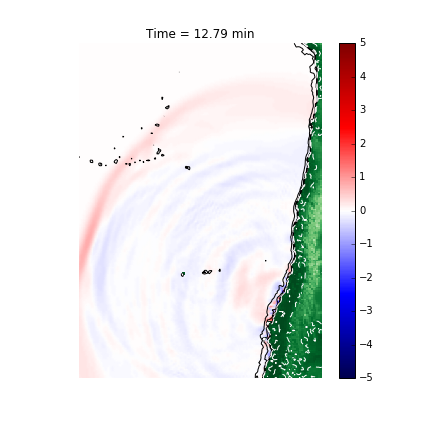
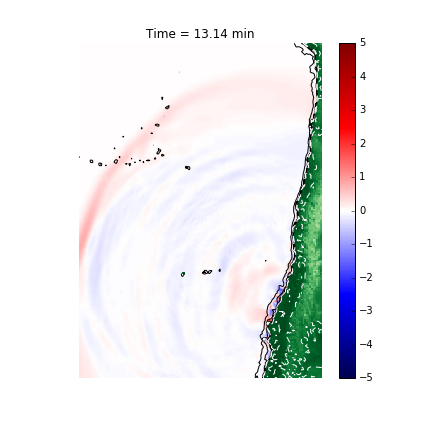
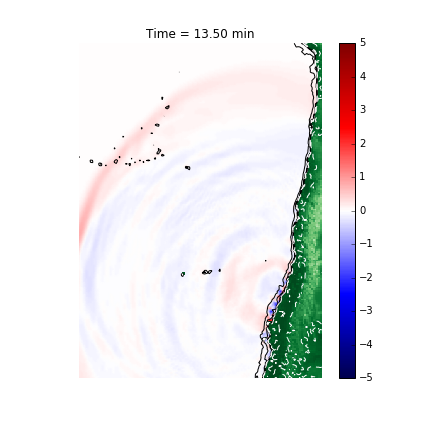
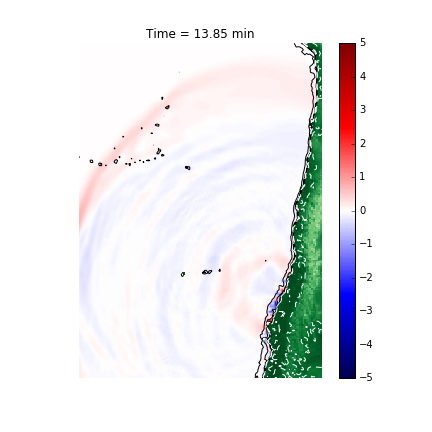
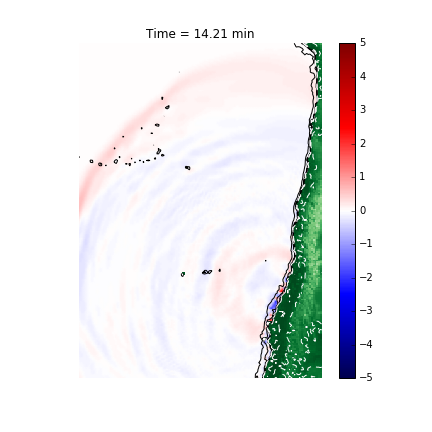
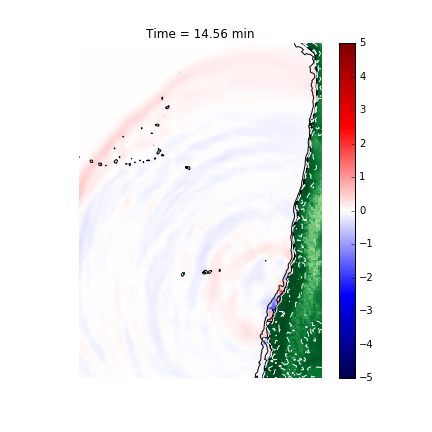
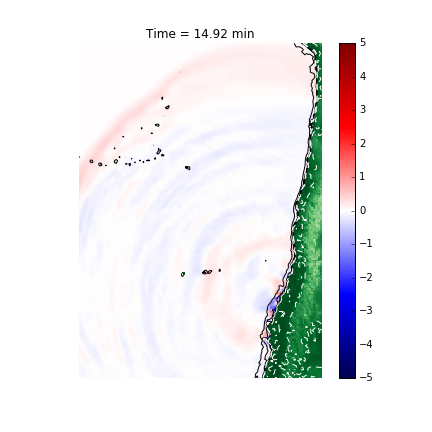
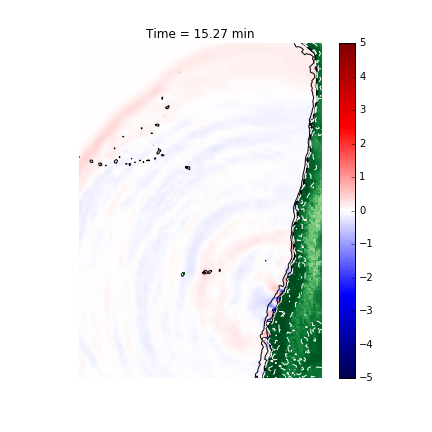
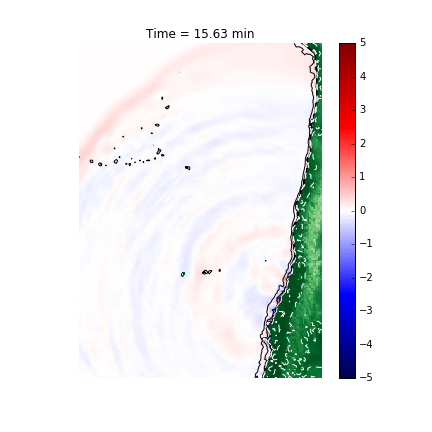
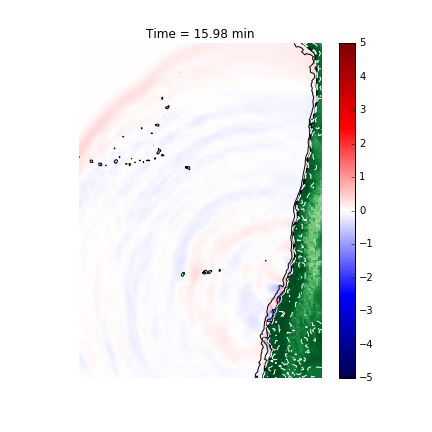
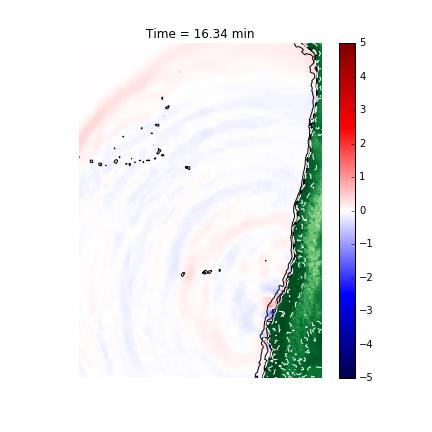
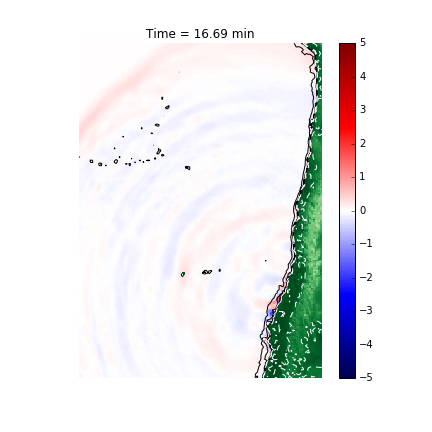
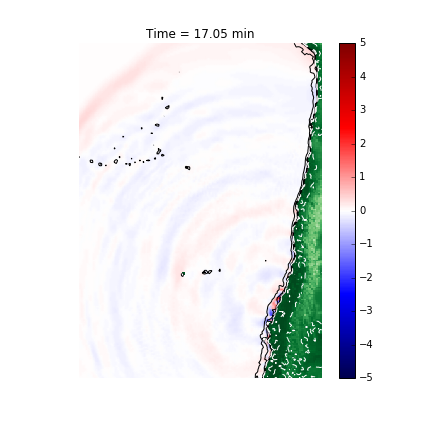
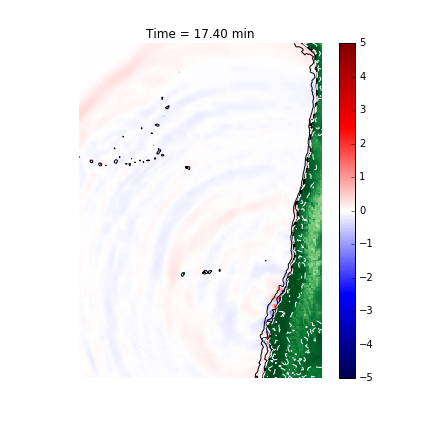
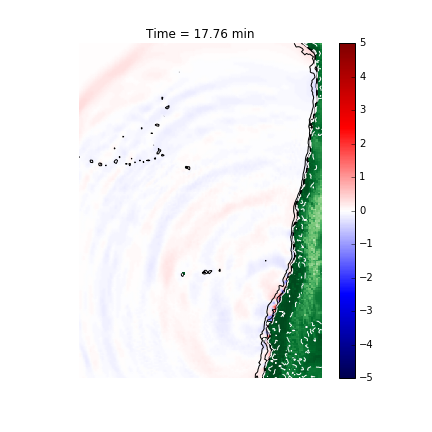
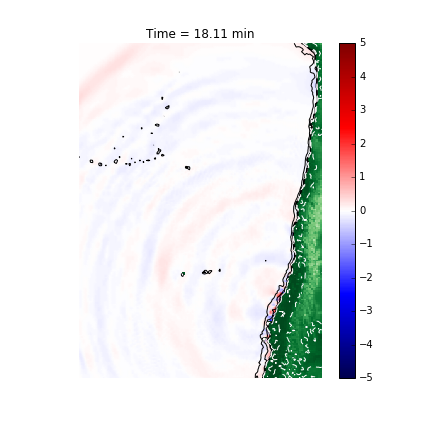
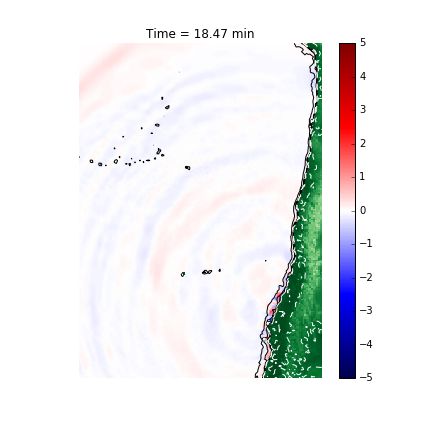
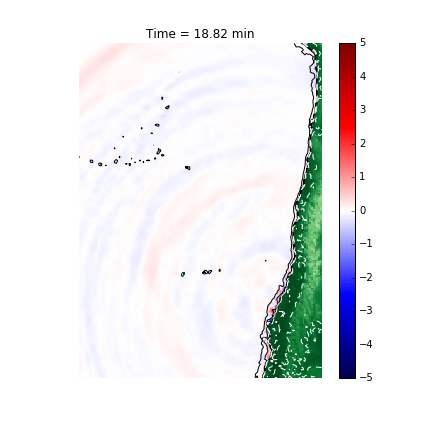
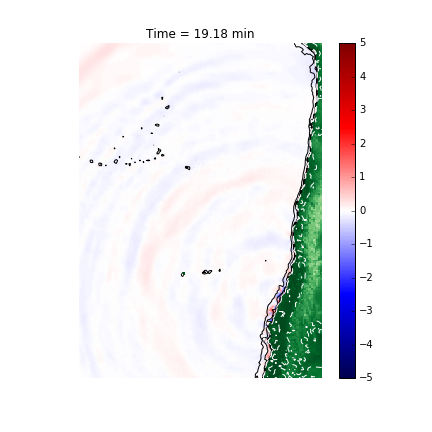
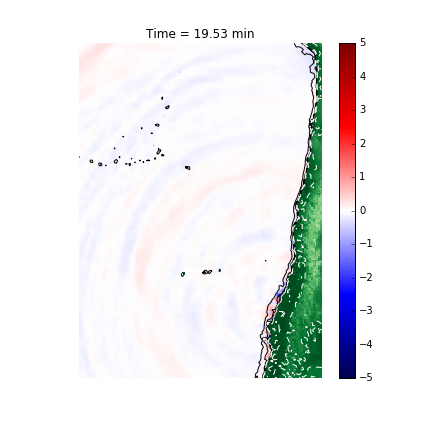
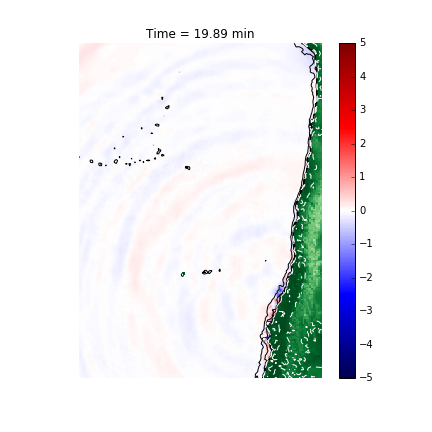
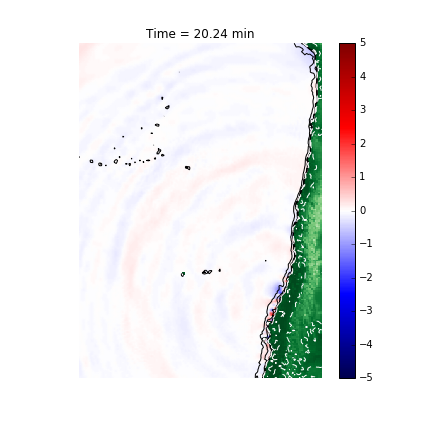
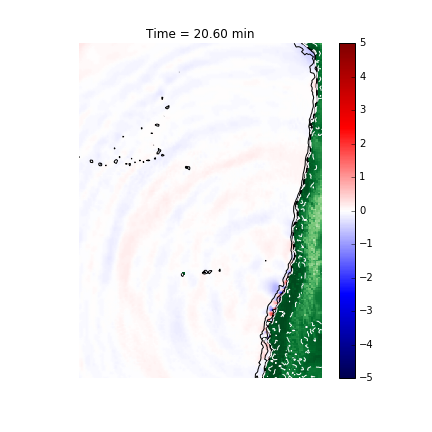
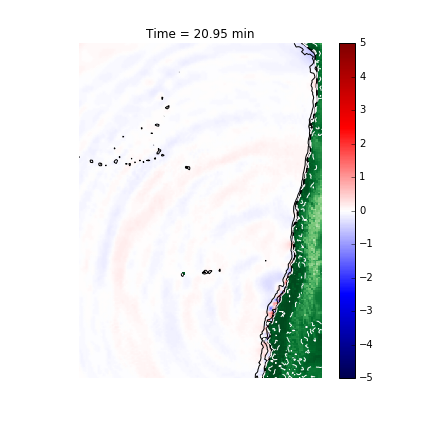

In [21]:
from matplotlib import animation
from JSAnimation import IPython_display

fig = plt.figure(figsize=(6,6))
ax2 = fig.add_subplot(111)
quad1 = ax2.pcolormesh(x,y,eta[0,:,:],vmax=5.,vmin=-5.,
                       shading='gouraud',cmap=plt.cm.seismic)
plt.pcolormesh(x,y,np.ma.masked_where(h>0,-h),vmin=0.0,vmax=8000, cmap=plt.cm.Greens_r)
ax2.contour(x,y,h,[0.,10.,100.,1000.],colors='k')
ax2.contour(x,y,h,[-10.,-100.,-1000.],colors='w')
ax2.set_axis_off()
t = ax2.set_title('Time = %.2f min'%(0.0))
# ax2.set_xlim(-10,5)
# ax2.set_ylim(-5,5)
cb2 = fig.colorbar(quad1,ax=ax2)
ax2.set_aspect('equal')
def init():
    quad1.set_array([])
    return quad1,


def animate(i):
    t.set_text('Time = %.2f min'%(i*dt/60.))
    quad1.set_array(np.ma.masked_where(h<0,eta[i*10,:,:]).ravel())
    return quad1,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=60, interval=100)

Funciona!, hay que revisar el borde superior (refleja), pero ya es aceptable para empezar en la GPU.

# El futuro

* Sponge layer o alguna condición de borde que sí funcione
* Okada model: LISTO
* GPU: LISTO
    * Batimetría como imagen png: LISTO
* Coordenadas esféricas